In [1]:
import gdal
import statsmodels.api as sm

In [2]:
fl = './data/swe_climatology_jepsen_krumholtz.tiff'
ds = gdal.Open(fl,gdal.GA_ReadOnly)
weights = np.array(ds.GetRasterBand(1).ReadAsArray())

#weights = np.load('./data/scaled_jepsen_weights_60m.npy')

fl = './data/LAI_krumholtz.tif'
#fl = './data/landsat_LAI_Boulder_60m_crop.tiff'
ds = gdal.Open(fl,gdal.GA_ReadOnly)
lai = np.array(ds.GetRasterBand(1).ReadAsArray())
lai[lai<0] = np.NaN

fl = './data/gridmet_60m_dem_krumholtz.tiff'
#fl = '/RHESSys/Como/auxdata/gridmet_dem_60m_crop.tiff'
ds = gdal.Open(fl,gdal.GA_ReadOnly)
dem = np.array(ds.GetRasterBand(1).ReadAsArray())

In [3]:
n,m = lai.shape

In [4]:
lai.shape

(18, 44)

In [5]:
dem.shape

(18, 44)

In [7]:
lai.shape = (n*m)
weights.shape = (n*m)
dem.shape = (n*m)

In [9]:
dem.max()

3507.3511

In [10]:
dem[dem==0] = np.NaN

In [11]:
np.nanmin(dem)

3274.2654

In [8]:
dem.min()

0.0

In [59]:
x = lai[(lai!=0) & (weights!=0) & (np.isnan(lai) != 1)]
y = weights[(lai!=0) & (weights!=0) & (np.isnan(lai) != 1)]


In [60]:
dat = pd.DataFrame()
dat['lai'] = x
dat['weight'] = y

In [61]:
len(dat)

401

In [62]:
dat.describe()

,lai,weight
count,401.000000,401.000000
mean,0.436534,0.331441
std,0.466700,0.250976
min,0.000017,0.023078
25%,0.082527,0.161784
50%,0.291038,0.247338
75%,0.636255,0.431253
max,2.553006,1.253639


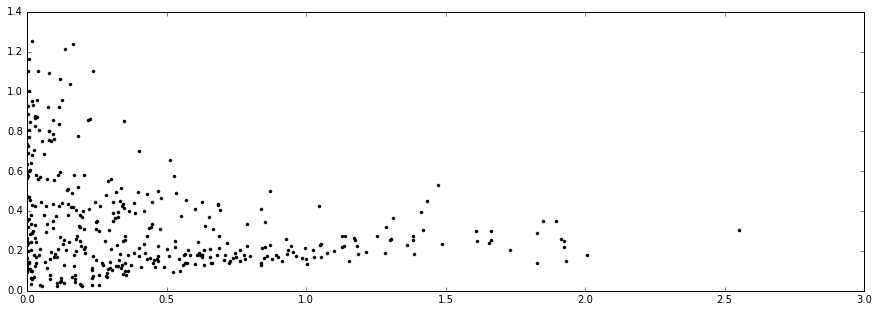

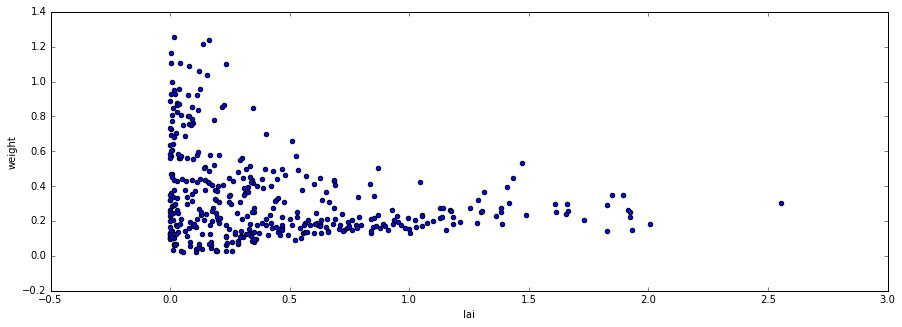

In [63]:
plt.figure(figsize=(15,5))
plt.plot(x,y,'.k')
dat.plot.scatter('lai','weight', figsize=(15,5))

In [64]:
X = sm.add_constant(x)
mod = sm.OLS(y,X).fit()

In [65]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     28.58
Date:                Wed, 20 Sep 2017   Prob (F-statistic):           1.52e-07
Time:                        14:31:45   Log-Likelihood:               -0.28306
No. Observations:                 401   AIC:                             4.566
Df Residuals:                     399   BIC:                             12.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3921      0.017     23.610      0.000         0.359     0.425
x1            -0.1390      0.026     -5.346      0.000        -0.190    -0.088
==============================================================================
Omnibus:                       73.317   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.504
Skew:                           1.141   Prob(JB):                     2.25e-25
Kurtosis:                       4.258   Cond. No.                         2.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
xx = np.linspace(dat.lai.min(),dat.lai.max(),100,endpoint=True)

In [67]:
yy = (xx*mod.params[1]) + mod.params[0]

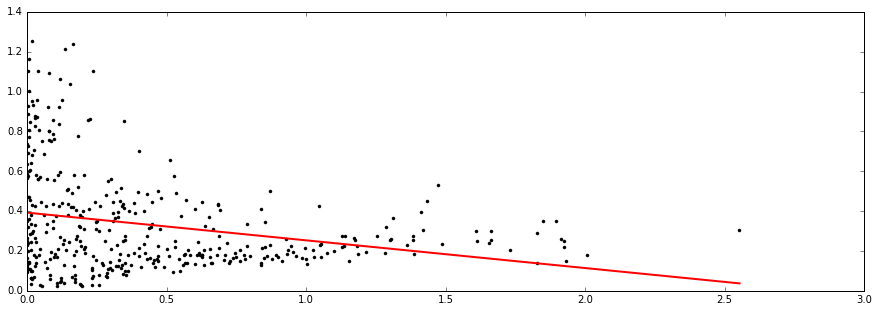

In [68]:
plt.figure(figsize=(15,5))
plt.plot(x,y,'.k')
plt.plot(xx,yy,'-r',lw=2)

In [89]:
abs_resid = np.absolute(mod.resid)

In [92]:
mod2 = sm.OLS(abs_resid,X).fit()

In [93]:
fitted = mod2.fittedvalues

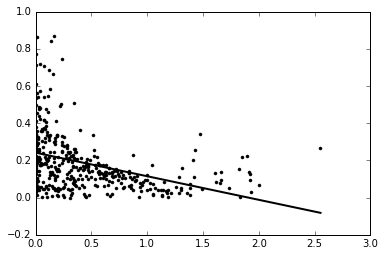

In [97]:
plt.plot(x,abs_resid,'.k')
plt.plot(xx,(xx*mod2.params[1])+mod2.params[0],'-k',lw=2)

In [99]:
mod3 = sm.regression.linear_model.WLS(y,X,weights=(1./np.square(fitted))).fit()

In [100]:
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.023
Model:                            WLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.574
Date:                Wed, 20 Sep 2017   Prob (F-statistic):            0.00211
Time:                        14:50:46   Log-Likelihood:                -384.49
No. Observations:                 401   AIC:                             773.0
Df Residuals:                     399   BIC:                             781.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.4120      0.046      8.941      0.000         0.321     0.503
x1            -0.0748      0.024     -3.094      0.002        -0.122    -0.027
==============================================================================
Omnibus:                      493.578   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           273576.055
Skew:                           4.940   Prob(JB):                         0.00
Kurtosis:                     130.578   Cond. No.                         46.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

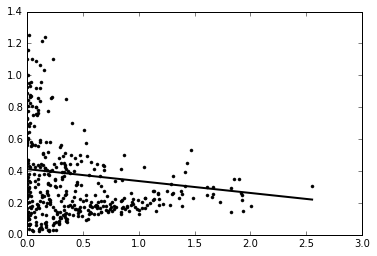

In [101]:
plt.plot(x,y,'.k')
plt.plot(xx,(xx*mod3.params[1])+mod3.params[0],'-k',lw=2)

In [81]:
l = lai[(lai!=0) & (weights!=0) & (np.isnan(lai) != 1) & (dem > 0) & (dem < 3380)]
w = weights[(lai!=0) & (weights!=0) & (np.isnan(lai) != 1) & (dem > 0) & (dem < 3380)]
d = dem[(lai!=0) & (weights!=0) & (np.isnan(lai) != 1) & (dem > 0) & (dem < 3380)]

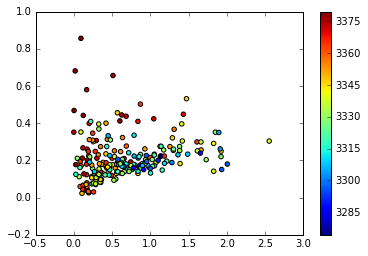

In [82]:
plt.scatter(l,w,s=20,c=d)
plt.colorbar()

In [73]:
d.min()

0.0

In [51]:
x = l[d>3300]
y = w[d>3300]

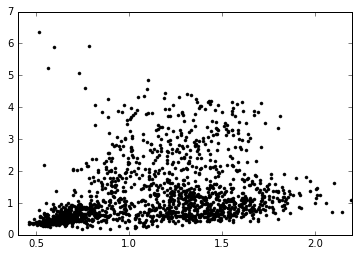

In [52]:
plt.plot(x,y,'.k')

In [12]:
import scipy

In [13]:
curve = lambda t,a,b: a + b*np.log(t)
pars,out = scipy.optimize.curve_fit(curve,x,y)
xx = np.linspace(x.min(),x.max(),1000)
yy = pars[0] + pars[1]*np.log(xx)

In [14]:
# compute r2: https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
yhat = pars[0] + pars[1]*np.log(x)
ybar = np.sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((y-ybar)**2)
r2 = 1- (ssreg/sstot)

# compute F statistic: http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
dfm = len(pars)-1
msm = ssreg/dfm
mse = sstot/dfm

f = msm/mse

# convert F to p-value: https://stackoverflow.com/questions/21494141/how-do-i-do-a-f-test-in-python
df1 = len(x)
df2 = len(y) - 1

pval = scipy.stats.f.cdf(f,df1,df2)

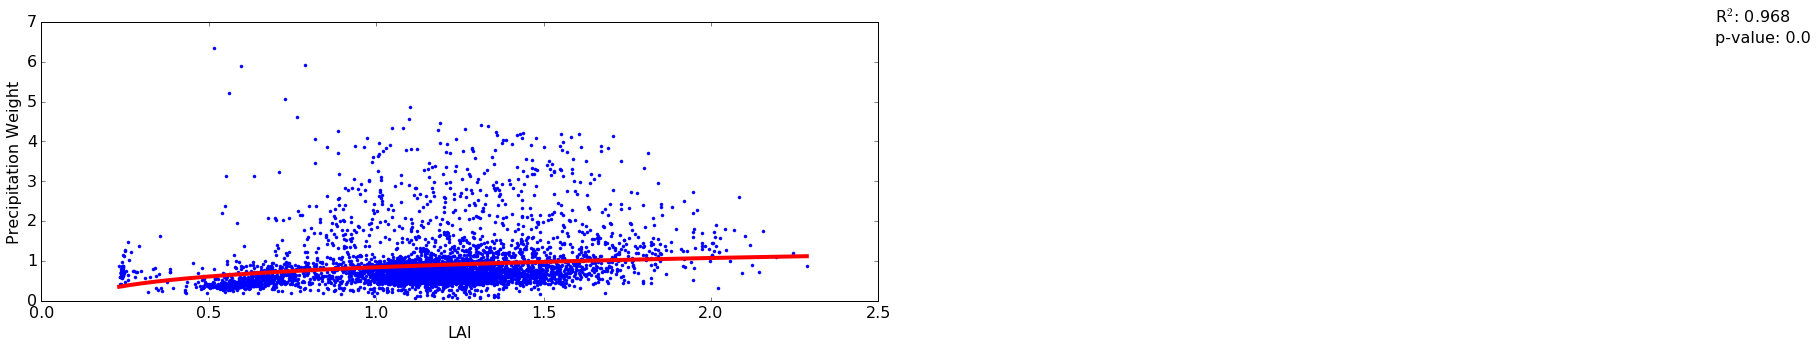

In [15]:
plt.figure(figsize=(15,5))
plt.plot(x,y,'.')
plt.plot(xx,yy,'-r',lw = 4)
plt.xlabel('LAI',fontsize=16)
plt.ylabel('Precipitation Weight', fontsize=16)
plt.text(5,7.,'R$^2$: %s'%(round(r2,3)), fontsize=16)
plt.text(5,6.5,'p-value: %s'%(round(pval,3)), fontsize=16)
ax = plt.gca()
[tick.label.set_fontsize(16) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(16) for tick in ax.yaxis.get_major_ticks()];
plt.savefig('./figures/precipitation_weight_lai.png',dpi=300,bbox_inches='tight')

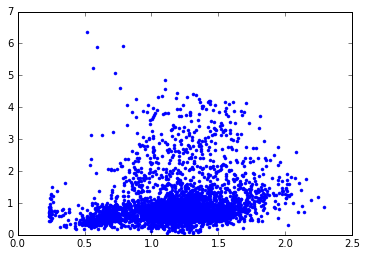

In [18]:
plt.plot(x,y,'.')

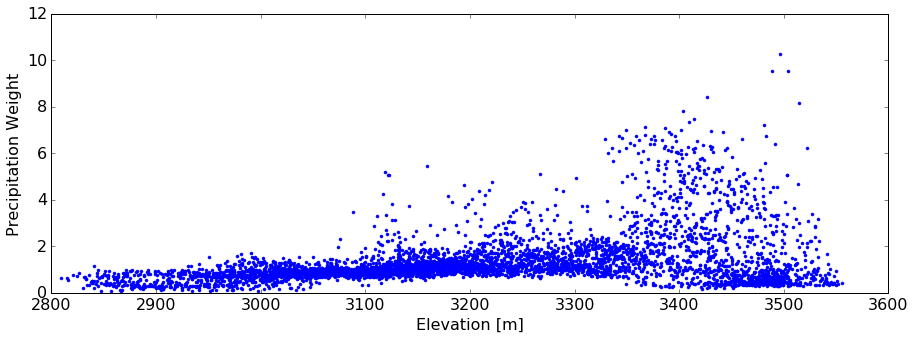

In [255]:
plt.figure(figsize=(15,5))
plt.plot(dem,weights,'.')
plt.xlabel('Elevation [m]', fontsize = 16)
plt.ylabel('Precipitation Weight', fontsize = 16)
ax = plt.gca()
[tick.label.set_fontsize(16) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(16) for tick in ax.yaxis.get_major_ticks()];
plt.savefig('./figures/precipitatioin_elevation.png',dpi=300,bbox_inches='tight')

In [229]:
# above ~3350 m the relationship between elevation and weight breaks down.
w = weights[dem<=3350]
e = dem[dem<=3350]
l = lai[dem<=3350]

In [230]:
e2 = sm.add_constant(e)
mod = sm.OLS(w,e2).fit()

x = np.linspace(e.min(),e.max(),100)
y = x*mod.params[1]+ mod.params[0] 

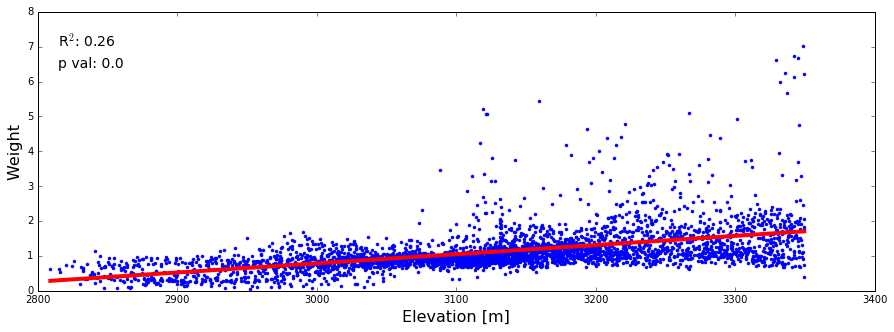

In [237]:
plt.figure(figsize=(15,5))
plt.plot(e,w,'.')
plt.plot(x,y,'-r',lw=4)
plt.xlabel('Elevation [m]', fontsize = 16)
plt.ylabel('Weight', fontsize = 16)
plt.text(2815,7,'R$^2$: %s'%(mod.rsquared.round(2)), fontsize = 14)
plt.text(2815,6.4,'p val: %s'%(mod.f_pvalue.round(3)), fontsize = 14)

In [226]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     1344.
Date:                Wed, 13 Sep 2017   Prob (F-statistic):          1.71e-252
Time:                        12:17:25   Log-Likelihood:                -2936.5
No. Observations:                3826   AIC:                             5877.
Df Residuals:                    3824   BIC:                             5890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -7.0910      0.224    -31.632      0.000        -7.530    -6.651
x1             0.0026   7.16e-05     36.667      0.000         0.002     0.003
==============================================================================
Omnibus:                     3211.592   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111763.114
Skew:                           3.843   Prob(JB):                         0.00
Kurtosis:                      28.338   Cond. No.                     8.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

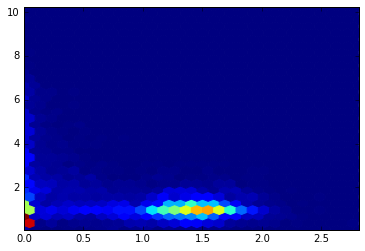

In [167]:
plt.hexbin(lai,weights,gridsize=30)

In [155]:
X = sm.add_constant(lai)
y = swe

mod = sm.OLS(y,X).fit()
mod.summary()

ValueError: endog and exog matrices are different sizes

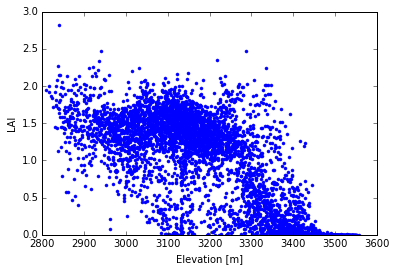

In [168]:
plt.plot(dem,lai,'.')
plt.xlabel('Elevation [m]')
plt.ylabel('LAI')

In [119]:
# above ~3350 m the relationship between elevation and weight breaks down.
w = weights[dem>=3350]
e = dem[dem>=3350]
l = lai[dem>=3350]

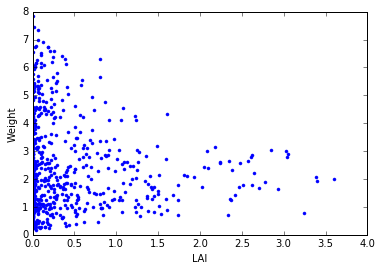

In [120]:
plt.plot(l,w,'.')
plt.xlabel('LAI')
plt.ylabel('Weight')

In [161]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1407.
Date:                Sun, 10 Sep 2017   Prob (F-statistic):          2.45e-261
Time:                        14:41:56   Log-Likelihood:                -2753.8
No. Observations:                3707   AIC:                             5512.
Df Residuals:                    3705   BIC:                             5524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -7.0857      0.219    -32.388      0.000        -7.515    -6.657
x1             0.0026   6.99e-05     37.512      0.000         0.002     0.003
==============================================================================
Omnibus:                     3139.130   Durbin-Watson:                   0.559
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118403.901
Skew:                           3.860   Prob(JB):                         0.00
Kurtosis:                      29.589   Cond. No.                     8.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""